## DS School의 데이터분석 팀에 오신 것을 환영합니다!



## 데이터 로딩하기

먼저 데이터를 로딩하도록 하겠습니다. 저번 주 수업과는 달리 여러분들은 엔지니어가 추출해준 csv 파일을 받은 것이 아닌 데이터베이스에 대한 접근 권한을 받았습니다. 따라서, 여러분들은 DB에서 필요한 데이터를 추출하는데 필요한 쿼리문을 이용하여 데이터를 불러와야 합니다.



--- 
### 데이터셋 설명

여러분들이 사용할 수 있는 테이블의 리스트는 다음과 같습니다.
 
* surveys

    DS School 홈페이지에 접속하게 되면 설문조사를 수행하게 되고, 이 결과를 바탕으로 적절한 강의를 선정해 과목 추천을 해드리고 있습니다. 이 때, 수집한 설문조사 내용은 고객의 수요를 조사하는데 아주 소중한 자산이 되고, 강의 내용에 대한 피드백이나 향후 오픈할 강의의 우선순위를 정하는데 쓰일 수 있습니다.
    
    
 * users
 
    여러가지 마케팅 채널들을 통해서 유입된 고객들에게는 별도의 id가 부여가 됩니다. 이를 통해 고객의 결제 유무 등을 파악할 수 있고, 이는 마케팅 채널별 효율 분석에 소중한 자산이 됩니다. mixpanel에서 사용하는 id와 DS School에서 자체적으로 사용하는 데이터베이스의 user id를 연결시켜주는 역할을 하고, 고객에 개인정보를 가지고 있습니다. 이는 비식별화 과정을 거쳐 제공됩니다.
    
    
* payments

    유저들의 결제 정보입니다. 연락처와 수강신청한 기수, 결제일, 결제 상태 등이 제공되는데 마찬가지로 개인정보는 비식별화되어있는 상태로 제공됩니다. 2018년 이전의 결제 정보가 포함되어 있습니다.
    

* 믹스패널 데이터

    DS School은 웹로그 데이터 분석을 위해 믹스패널을 사용합니다. 2009년 설립된 믹스패널은 사용자 추적을 기본으로 하는 분석 툴로, 원하는 서비스 사용자를 지정하면 해당 유저의 활동을 모두 조회할 수 있는 기능을 제공해줍니다. 이를 통해 해당 사용자 그룹의 특성과 사용 패턴을 알 수 있습니다. 유명 액셀러레이터 ‘Y Combinator’의 멤버로 트위치, 우버, 핏빗, 스포티파이, 세일즈포스 등의 고객사를 보유하고 있으며 2016년 1월 기준 누적 투자액 800억원을 기록함과 동시에 기업 가치 9,000억원대로 평가 받는 분석툴이기도 합니다. 실시간분석이 가능하며 코호트 분석과 잔존율, 퍼널 분석이 가능합니다. 믹스패널 데이터 또한 고객의 유입경로 등의 정보를 가지고 있습니다. 제공되는 데이터는 믹스패널 데이터베이스에서 추출한 자료이기 때문에 csv파일로 제공됩니다.

---

**1. 데이터베이스에서 설문조사 결과를 읽어와주세요. 그 다음 사용자와 질문을 기준으로 정렬해주세요.**

설문조사 결과를 분석하여, DS School 홈페이지에 접속하는 사람들이 왜 데이터 사이언스에 관심이 있는지 파악하려고 합니다. 고객들의 니즈를 파악하여 향후 어떤 강의를 우선적으로 오픈할지 결정할 수도 있고, 수강생들에게 어떤 내용의 자료를 보여드려야할지 결정할 수도 있습니다.

In [1]:
#데이터를 불러오는데 필요한 판다스와 sqlite3를 import 해주세요.
import pandas as pd
import sqlite3

In [2]:
# 판다스는 테이블을 출력할 때, row나 column이 일정 개수 이상 넘으면 생략해서 보여줍니다.
# column을 생략하길 원하지 않는 경우 아래와 같이 옵션을 주어 생략되지 않도록 할 수 있습니다.
pd.options.display.max_columns = 50

In [3]:
# data폴더의 dsschool.db에 접속을 해주세요.
connect = sqlite3.connect('data/dsschool.db')
connect

In [4]:
# 'surveys' 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러와주세요.
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


surveys를 user_id와 question_id, 그리고 created_at를 기준으로 정렬해주세요. user_id를 우선으로 정렬해야 합니다.

In [5]:
# Write your code here!
surveys = surveys.sort_values(by=["user_id","question_id","created_at"])

print(surveys.shape)
surveys.head()

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


---

**2. Survey 정보를 cleaning해주세요.**

Surveys 테이블은 원본 데이터이기 때문에 분석을 위해서는 cleaning 작업이 필요합니다. 여러분이 해주셔야 할 처리는 다음과 같습니다.
  
     * answer 값이 't', 'f'로 입력되어 있는데 이를 True, False로 변환해주세요.
     * created_at과 updated_at을 datetime 형식으로 변환해주세요.
     * 같은 user_id가 여러번의 설문조사를 응답한 경우도 제거해주세요.

In [6]:
# Write your code here!
for i in range(1,13):
    old_column = f"answer{i}_selected"
    new_column = f"answer{i}_selected(bool)"
    
    surveys[new_column] = surveys[old_column] == 't'
    
print(surveys.shape)
surveys.head()

(136063, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [7]:
# Write your code here!
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])

surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

In [8]:
# Write your code here!
surveys = surveys.drop_duplicates(["user_id", "question_id"], keep = 'last')
# 중복제거, keep 마지막꺼 남기고 

print(surveys.shape)
surveys.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


---

**3. 데이터베이스에서 결제정보를 불러와주세요. 그리고 연락처와 수업정보를 정리해주세요.**

데이터베이스의 payments 테이블에서 데이터를 읽어오겠습니다. 마찬가지로 쿼리문과 데이터베이스에 접속하기 위한 커넥터를 이용하여 payments 테이블을 가져옵니다.

In [9]:
# Write your code here!
query = """
    SELECT *
        FROM 'payments'
"""

payments = pd.read_sql(query, connect)

print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


개인정보 보호를 위해 연락처 정보는 비식별화 처리된 상태입니다.

이번에는 연락처 정보를 정리하도록 하겠습니다. 결제창에서 수기로 연락처를 입력받아 수강생별로 연락처의 양식이 들쑥날쑥합니다. 이번에는 모든 연락처의 양식을 010-xxxx-xxxx으로 통일해주세요. 단, 010으로 시작하지 않는 전화번호는 잘못 기입된 전화번호라고 가정하고 NaN값 처리해주세요.

In [10]:
import re
p_clean = payments[payments["연락처"].str.match(pat = '(010)|(\+82)')]

print(p_clean.shape)
p_clean.head()

(932, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


In [11]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수를 만들어 주세요. 그리고 apply를 이용해 이를 적용해주세요.
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

#대시가 문자열에 이미 있다면 번호를 그대로 반환합니다.
    if "-" in phone_number:
        return phone_number
    
#대시가 문자열에 없다면 자릿수에 맞추어 대시를 넣어줍니다.
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

#연락처 데이터에 clean_phone_number 함수를 각각 apply를 이용해 적용시킵니다.
#그리고 이 데이터들로 연락처(clean) 칼럼을 대체합니다.

#Write your code here!
payments["연락처(clean)"] = payments["연락처"].apply(clean_phone_number)
phone_clean = payments[["연락처","연락처(clean)"]]

print(phone_clean.shape)
phone_clean.head()

(937, 2)


,연락처,연락처(clean)
0,01056007186,010-5600-7186
1,01050015510,010-5001-5510
2,01044158112,010-4415-8112
3,01065775220,010-6577-5220
4,010-6433-3577,010-6433-3577


In [12]:
# string.split() 사용 예시입니다. 구분 기준마다 문자를 나누어 리스트로 만들어줍니다.
print('010-1234-5678'.split('-'))

#별도로 구분 기준을 정해주지 않는 경우 자동으로 공백을 기준으로 분리합니다.
print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [13]:
#뒤의 2개를 붙이고 싶은 경우 붙이는 ''.join()을 이용합니다.
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [14]:
#Write your code here!
payments[["수업타입","기수"]] = payments["신청수업"].str.split(' ',expand=True)

print(payments.shape)
payments[["신청수업","수업타입","기수"]].head()

(937, 12)


,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


---

**4. 2018년 이후 결제 정보를 정리해주세요.**

결제정보가 잘 정리되어 있지만, 분석을 진행하기 위해 처리해야할 사항이 남아있습니다. 
    
    1) 신청날짜 컬럼을 datetime 자료형으로 만들어주세요.
    2) 결제가 완료된 경우 True, 아닌 경우 False인 컬럼을 만들어주세요.


In [15]:
#Write your code here!
payments["신청날짜"] = pd.to_datetime(payments["신청날짜"])
payments.dtypes

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
수업타입                  object
기수                    object
dtype: object

In [16]:
payments["상태(bool)"] = payments["상태"] == "결제 완료"
# payments[payments["상태(bool)"] == False]

payments[["상태","상태(bool)"]].head()

,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


---

**5. 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가해주세요. 그리고, 금액 정보를 정수형 (int)로 바꿔주세요.**

월, 일, 시간, 요일 등을 기준으로 피벗테이블을 만들거나 그래프를 그리려면 그에 해당하는 칼럼을 만들어주어야 합니다. 입문반에서 배웠던 슬라이싱(Slicing)을 이용해 문자를 쪼개는 방식으로 할 수도 있지만, 자료형을 datetime으로 만들어버리면 더욱 쉽게 월, 일, 시간, 요일 등의 정보를 만들어낼 수 있습니다.

In [17]:
#Write your code here!
payments["신청날짜(연)"] = payments["신청날짜"].dt.year
payments["신청날짜(월)"] = payments["신청날짜"].dt.month
payments["신청날짜(일)"] = payments["신청날짜"].dt.day
payments["신청날짜(시)"] = payments["신청날짜"].dt.hour
payments["신청날짜(분)"] = payments["신청날짜"].dt.minute
payments["신청날짜(초)"] = payments["신청날짜"].dt.second
payments["신청날짜(요일)"] = payments["신청날짜"].dt.day_name()

In [18]:
def clean_cost(cost):
    return cost.replace(",","")
    
payments["금액(int)"] = payments["금액"].apply(clean_cost).astype(int)
payments["금액(int)"].head()

0    495000
1    594000
2    495000
3    495000
4    594000
Name: 금액(int), dtype: int64

In [19]:
print(payments.shape)
payments[["신청날짜","신청날짜(연)","신청날짜(월)","신청날짜(일)","신청날짜(시)","신청날짜(분)","신청날짜(초)","신청날짜(요일)","금액","금액(int)"]].head()


(937, 21)


,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액,금액(int)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday,"495,000",495000
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday,"594,000",594000
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday,"495,000",495000
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday,"495,000",495000
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday,"594,000",594000


---

**6. 결제 데이터를 바탕으로 요일별, 시간별 결제량의 차이를 구해주세요.**

DS School에서 주로 사용하고 있는 마케팅 채널인 페이스북은 시간, 요일대별 광고 노출빈도를 조절할 수 있는 기능이 있습니다. 기존의 결제 패턴을 분석해 결제가 특정 시간대에서 높게 일어난다면 해당 시간대에 더 많은 예산을 사용하는 것이 효율적일 것입니다.

In [21]:
#Write your code here!
import numpy as np

pay_day_name = pd.pivot_table(payments, index="신청날짜(요일)", values="금액(int)", aggfunc=[np.sum, "count"])

dayname = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

pay_day_name.loc[dayname]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


평일의 결제량이 주말에 비해 매우 높은 것을 알 수 있습니다. 이를 시간별 결제량과 연결지어보도록 하겠습니다. 마찬가지로 시각에 따른 피벗테이블도 만들어 주세요.

In [22]:
#Write your code here!
pd.pivot_table(payments, index="신청날짜(시)", values="금액(int)", aggfunc=[np.sum, "count"])

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


DS School 수강생들의 대부분이 직장인임을 감안할 때, 일별, 시간별 결제금액을 보고 '직장인들이 주로 근무시간에 결제를 결심한다.' 라는 합리적인 가설을 세울 수 있습니다. 이 가설은 점심시간대인 12시부터 1시 사이에 급격하게 감소하는 것을 통해 더 지지받을 수 있습니다.

이를 바탕으로 콘텐츠 제작자에게 근무시간에 딴 짓을 하는 직장인들을 타겟팅하는 콘텐츠를 제작해달라고 요청할 수 있습니다. 또한, 페이스북이 제공하는 광고 시간 타겟팅 기능을 이용하여 근무시간대에 들어가는 광고예산의 비중을 늘릴 수도 있습니다.


---

**7. 사용자의 니즈를 바탕으로 향후 오픈할 강의의 우선순위를 정하려고 합니다. 설문조사 데이터에서 답변을 정리해서 보여주세요.**

우선, 각 질문과 답변의 내용은 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question_text</th>
      <th>answer1_text</th>
      <th>answer2_text</th>
      <th>answer3_text</th>
      <th>answer4_text</th>
      <th>answer5_text</th>
      <th>answer6_text</th>
      <th>answer7_text</th>
      <th>answer8_text</th>
      <th>answer9_text</th>
      <th>answer10_text</th>
      <th>answer11_text</th>
      <th>answer12_text</th>
    </tr>
    <tr>
      <th>question_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>데이터 사이언스를 배우고 싶은 이유는 무엇인가요?</td>
      <td>현재 다니는 직장에서 즉시 활용할만한 데이터 관련 지식을 습득하기 위해</td>
      <td>데이터와 인공지능 관련 석사/박사로 진학하기 위해</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직을 하기 위해</td>
      <td>기술 창업을 위한 원천기술을 습득하기 위해</td>
      <td>최신 데이터사이언스 트렌드에 관심이 있어서</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>이전까지 수학, 통계학, 프로그래밍에 관한 공부를 얼만큼 하셨나요?</td>
      <td>최근 2~3년간 수학, 통계학 공부를 해 본 적이 없으며, 프로그래밍 역시 해 본 ...</td>
      <td>수학과 통계학은 자신 없지만, 프로그래밍은 조금 해 보았다.</td>
      <td>최근까지 수학과 통계학을 공부해왔지만, 프로그래밍은 해 본 적 없다.</td>
      <td>수학과 통계학을 공부하였으며, 프로그래밍도 할 줄 안다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>데이터 사이언스를 어디에 활용하고 싶으신가요? (복수 선택 가능)</td>
      <td>상품, 컨텐츠 추천 엔진을 구현하고 싶다. (ex: 의류, 영화, 음악 추천 등)</td>
      <td>주가를 분석하고 예측할 수 있는 방법을 알고 싶다. (ex: 주가 등락, 비트코인 ...</td>
      <td>부동산 시세와 그 등락을 예측하고 싶다. (ex: 아파트, 점포, 오피스텔 등)</td>
      <td>텍스트 데이터를 적극 활용해보고 싶다. (ex: 스팸 필터링, 검색 엔진, 법률/판...</td>
      <td>이미지 데이터를 다뤄보고 싶다. (ex: 얼굴 인식, 자동차 표시판 분석 등)</td>
      <td>온라인 커머스에서 판매하는 상품의 재구매율을 늘리고 싶다.</td>
      <td>정기 구독 상품의 구독 이탈률(Churn Rate)을 낮출 수 있는 방법을 알고 싶다.</td>
      <td>마케팅 데이터를 분석하여, 온라인 마케팅의 효율을 높이고 싶다.</td>
      <td>해상사고나 범죄를 분석/예측하여 그 비율을 낮추고 싶다.</td>
      <td>의료 데이터나 신약 분석 등에 활용하고 싶다.</td>
      <td>공공데이터를 활용하는데 도움이 되고 싶다.</td>
      <td>기타</td>
    </tr>
    <tr>
      <th>4</th>
      <td>수강을 하면서 과제를 어느정도까지 완수하실 수 있으신가요?</td>
      <td>현재 하는 일이 바빠서, 과제가 주어지면 전혀 할 수가 없다.</td>
      <td>여가시간을 활용하여 무리하지 않는 선에서 어느정도의 과제는 해결할 수 있다.</td>
      <td>다소 시간이 넉넉하기 때문에 많은 과제가 주어진다고 해도 충분히 완수할 수 있다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DS School의 과정을 마친 후 데이터를 얼만큼 잘 다루고 싶은가요?</td>
      <td>취미로 데이터를 다뤄볼 수 있을 정도면 충분하다.</td>
      <td>대학원 연구실에 가도 뒤쳐지지 않을 만큼 이론과 실전 경험을 쌓고 싶다.</td>
      <td>현재 다니는 회사에서 데이터 관련 업무를 병행할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>수업은 어느 시간을 선호하시나요? (중복 선택 가능)</td>
      <td>주중 아침</td>
      <td>주중 낮</td>
      <td>주중 저녁</td>
      <td>주말 아침</td>
      <td>주말 낮</td>
      <td>주말 저녁</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>수업을 듣는 기간동안 얼만큼 시간을 할애할 수 있나요?</td>
      <td>현재 하는 일에 지장이 없는 선에서, 파트타임으로 수업을 들을 수 있다.</td>
      <td>현재 하는 일은 쉬는 한이 있더라도, 풀타임으로 수업을 듣고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

고객들이 데이터 사이언스를 어디에 활용하고 싶은지에 대한 이유를 정리하기 위해서는 1번 3번 질문에 대한 정답을 정리해서 보여주어야 합니다. 판다스의 피벗 테이블을 이용하여 1번, 3번 질문에 대한 응답을 정리해서 보여주세요. 

In [23]:
#리스트 안에 for 문을 넣을 수 있습니다.
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

In [24]:
#Write your code here!
sur_1_3 = pd.pivot_table(surveys, index=["question_id"])
sur_1_3 = sur_1_3[answer_list]
sur_1_3 = sur_1_3.loc[[1,3]]
sur_1_3

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


1번 질문에는 1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해) 가 가장 높은 답변을 받았고, 3번 질문에서는 8번 응답 (마케팅 데이터를 분석하여 마케팅의 효율을 높이고 싶다.)가 가장 높은 응답을 받았습니다.

하지만, 최종 목표는 결제 유도이기 때문에, 모든 설문조사를 완료한 사람이 아닌 결제를 완료한 사람들의 결과만을 가지고 분석해야 합니다. 이를 위해 surveys 테이블과 payments 테이블을 병합할 필요가 있습니다.

---

**8. 결제 데이터와 유저 데이터에는 동일한 id (payment_id), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 pandas merge로 해주세요.**

In [25]:
#Write your code here!
query = """
    SELECT *
        FROM 'users'
"""

users = pd.read_sql(query, connect)

print(users.shape)
users.head()

(48030, 4)


,user_id,mixpanel_id,payment_id,email
0,2q0ucs4kiiko,DLDEBFOWFZMCIWXRWZZLGULCHTPPYZTDPSTFMZCQUPNNZS...,None,c4l74sjvhybg@dsschool.co.kr
1,n5yxumr8w20w,TCCZWHROYZCUABWOHIXIYDSLKYPQHLUGVYYLTDAQETOEEF...,None,wgkwoep07x26@dsschool.co.kr
2,tjzjbj2awswz,BBRFELKWMCNGYXSFZKPCUXXAAVJZHMDHRZKZKXSDIRDIFS...,None,64elpdsxe0wz@dsschool.co.kr
3,xvt93f37om9q,TKBAYLPGJKWLUGKZQVBJEKKMIZULJIAVUUFBXMZIEPGXGB...,None,hgvkoilokgfq@dsschool.co.kr
4,smsnz99ugq3q,PAAVHVFEYHJZUWNYRDVEXWXXLLVVAWNJDIRSQTQYGXQLAK...,None,5ztx2nzuitjg@dsschool.co.kr


In [26]:
print(payments.shape)
payments.head()

(937, 21)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,5기,True,2018,1,31,15,29,24,Wednesday,594000
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,입문반,22기,True,2018,1,31,14,4,14,Wednesday,495000
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,입문반,22기,True,2018,1,31,10,18,19,Wednesday,495000
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,중급반,5기,True,2018,1,30,19,12,54,Tuesday,594000


In [27]:
pay_user = pd.merge(payments, users, left_on="이메일", right_on="email")

print(pay_user.shape)
pay_user.head()

(2911, 25)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,2ireif5hcmum,LXLZTHNKXXRGCGUDWJQBFOBVLAMAVDERJIHBYSKOJURJEE...,None,0usbs4knns0s@dsschool.co.kr
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,rxscxv1ym6q3,GSICVJAYOOXJFQUYDWYTLPTXFPAIPWOLOJHJILYFSDUFRZ...,None,0usbs4knns0s@dsschool.co.kr
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,5pi3y5b5vyyz,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,None,0usbs4knns0s@dsschool.co.kr
4,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,5기,True,2018,1,31,15,29,24,Wednesday,594000,c2qg2tlmmx5h,VGYKVUDURCXYRZCZUYMPCBZEVJGJOJOELMLVKKLGYLEDQF...,None,ysf7krr1j67o@dsschool.co.kr


In [28]:
print(surveys.shape)
surveys.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [29]:
pay_user_sur = pd.merge(pay_user, surveys, on="user_id")

print(pay_user_sur.shape)
pay_user_sur.head()

(3035, 53)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,t,None,None,None,None,None,None,None,None,None,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368,False,False,True,False,False,False,False,False,False,False,False,False
4,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,None,None,None,None,None,None,None,None,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586,False,True,False,False,False,False,False,False,False,False,False,False


---

**9. 결제 데이터와 유저 데이터에는 동일한 id (e-mail), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 SQL join으로 합쳐주세요.**

In [31]:
# Write your code here!
query = """
    SELECT *
        FROM 'payments'
    INNER JOIN 'users' on 'payments'.이메일 = 'users'.email
    INNER JOIN 'surveys' on 'surveys'.user_id = 'users'.user_id
"""

pay_usr_sur = pd.read_sql(query, connect)
pay_usr_sur.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
3,8vpohybxjxld,이민국,nd5i4157vo2k@dsschool.co.kr,010-6215-4832,2018-01-20 13:18:45,딥러닝 2기,"1,043,000",카드결제,결제 완료,dcnz8pmph34i,NDMOCEUGYGEAWKWDEKHSNBYRXNQJAEEESMIQUNVYYHFKJI...,None,nd5i4157vo2k@dsschool.co.kr,c4ir6lwzgkd4,dcnz8pmph34i,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-19 02:43:44.446664,2018-01-19 02:43:44.446664
4,x6n32merwsyv,이민국,nd5i4157vo2k@dsschool.co.kr,010-7681-3527,2018-01-19 13:31:11,입문반 21기,"495,000",카드결제,결제 완료,dcnz8pmph34i,NDMOCEUGYGEAWKWDEKHSNBYRXNQJAEEESMIQUNVYYHFKJI...,None,nd5i4157vo2k@dsschool.co.kr,c4ir6lwzgkd4,dcnz8pmph34i,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-19 02:43:44.446664,2018-01-19 02:43:44.446664


---

**10. 8번에서 merging한 데이터 중 필요한 컬럼만 추려주세요. 그리고 데이터를 클리닝해주세요.**

모든 테이블을 병합한 상태이기 때문에 데이터의 컬럼이 과도하게 많은 상태입니다. 모든 컬럼을 분석에 사용할 필요가 없기 때문에 사용할 컬럼만 골라 데이터를 슬라이싱하려고 합니다. 사용할 컬럼을 아래에 적어놓았습니다. 컬럼명이 다른 경우 수정해서 사용해주세요.

In [32]:
# 분석에 필요한 컬럼들의 리스트입니다.
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남겨주세요.

#Write your code here!
dsschool = pay_user_sur[selected_columns]
dsschool.head()


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156
1,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,2,False,False,False,True,False,False,False,False,False,False,False,False,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754
2,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,3,False,False,False,True,True,False,False,False,False,False,True,False,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897
3,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368
4,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,5,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586


In [33]:
#Write your code here!
dsschool = dsschool.sort_values(by = ["이메일","question_id","created_at"])
dsschool = dsschool[dsschool["신청날짜"] >= dsschool["created_at"]]
dsschool = dsschool.drop_duplicates(['이메일','신청수업','question_id'], keep = 'last')

print(dsschool.shape)
dsschool.head()

(1092, 25)


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


---

**11. 위에서 정리한 결과를 바탕으로 결제를 한 사람들의 설문조사 1,3번 응답결과를 정리해주세요.**

In [34]:
# Write your code here!
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

ds_1_3 = pd.pivot_table(dsschool, index="question_id")
ds_1_3 = ds_1_3[answer_list]
ds_1_3 = ds_1_3.loc[[1,3]]
ds_1_3

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


이제 위의 결과와 비교를 해야합니다. 표 2개를 놓고 직접적으로 비교하는 방법도 있지만, 역시 그래프로 비교하는 것이 더 직관적인 경우도 있습니다.

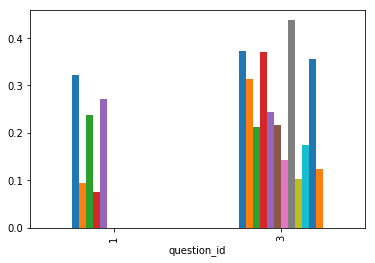

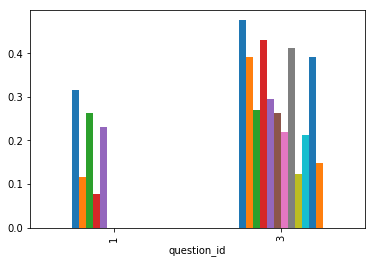

In [35]:
# 그래프를 주피터 화면에 띄우기 위한 주피터 명령어입니다.
%matplotlib inline

#Write your code here!
sur_plot = sur_1_3.plot.bar(legend=False)
ds_plot = ds_1_3.plot.bar(legend=False)

모든 설문조사 결과와 결제한 사람들의 설문조사 결과는 상당히 비슷한 양상을 보입니다. 그런데, 1번 질문의 5번 응답 '최신 데이터사이언스 트렌드에 관심이 있어서' 응답을 한 경우는 결제율이 낮다는 것을 알 수 있습니다. 

아무래도 고가의 강의이다 보니, 관심만 있는 정도로는 구매로의 전환이 쉽게 일어나지 않습니다.
1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해)의 비율이 압도적으로 높고, 두 번째는 전업 데이터 사이언티스트로 이직/전직하기 입니다. 

모든 사람을 대상 설문조사 결과와 결제자 대상 설문조사 결과를 3번 질문에서도 비교해 봤을 때, 응답 8번 또한 눈에 띄게 줄어든 것을 확인할 수 있습니다. 8번의 응답은 '마케팅 데이터를 분석하여 마케팅의 효율을 높이기' 입니다. 이를 바탕으로 마케팅에 관심이 있는 사람들은 데이터 마케팅 강의로 이탈하거나 사이언스 강의를 수강하지 않는다고 생각할 수 있습니다. 

현재 설문조사 결과를 종합해봤을 떄, 직장에서 업무에 데이터 사이언스를 활용하면서 '추천 시스템'을 만들거나 텍스트 데이터를 다루는 것에 대한 수요가 매우 높음을 확인할 수 있습니다.

엑셀에도 텍스트를 다룰 수 있는 기능들이 많이 있지만, 파이썬은 다양한 오픈소스와 함께 자유도가 높아 잘만 배워둔다면 엑셀에 비해 텍스트를 훨씬 쉽게 다룰 수 있습니다. 

또한, 카카오 같은 플랫폼 사업자나 여러 이커머스 기업들은 추천시스템 연구를 꾸준히 진행하고 있고 그 수요도 몹시 높은 편입니다. 이를 통해 향후 제작할 컨텐츠에서 텍스트나 추천시스템의 비중을 늘려볼까 합니다.

---

**12. created_at은 세션이 생성된 시간이고 '신청날짜'는 실제로 수업을 신청한 시간입니다. DS School 홈페이지에 처음 접근한 순간부터 결제까지 걸린 시간을 계산해주세요. 단, 신청날짜가 created_at보다 작은(먼저인) 경우가 있는데 이를 제외하고 구해주세요.**

In [36]:
#Write your code here!
dsschool["time"] = dsschool["신청날짜"] - dsschool["created_at"]
dsschool[["time"]].head()

,time
887,09:14:16.752474
888,09:14:12.718888
889,09:13:59.302001
890,09:13:55.157445
891,09:13:51.359780


In [37]:
#Write your code here!
dsschool["time"] = pd.to_datetime(dsschool["time"])
ds_time_day = (
    (dsschool["time"].dt.day - 1) 
    + (dsschool["time"].dt.hour / 24) 
    + (dsschool["time"].dt.minute / 60 / 24) 
    + (dsschool["time"].dt.second / 60 / 60 /24)
)
ds_time_day.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


887    0.384907
888    0.384861
889    0.384711
890    0.384664
891    0.384618
Name: time, dtype: float64

In [38]:
#그래프를 그리기 위한 library를 불러옵니다.
import seaborn as sns
# import matplotlib.pyplot as plt

In [39]:
# seaborn의 경우 테마설정을 다음과 같이 할 수 있습니다. 사전 구성된 테마는 다음과 같습니다. {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid", {'grid.linestyle': '--'})

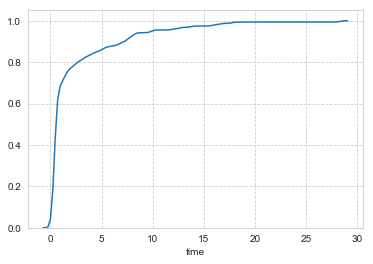

In [40]:
# distplot을 그려주세요, kde_kws={'cumulative' : True} 옵션을 통해 누적분포를 그리는 것이 좋습니다. 또한, hist=False로 하는 것이 보기에 좋을 수 있습니다.

#Write your code here!
sns.distplot(ds_time_day, kde_kws={'cumulative' : True}, hist=False)

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 훨씬 많은 고민을 한다는 것을 파악할 수 있습니다. 이를 통해 DS School에 관심을 가졌지만 아직 결제를 하지 않은 잠재고객들의 결제 가능성을 역으로 추정해 리타겟팅 전략의 예산 분배를 진행할 수 있습니다. 

---

**14. 믹스패널 데이터를 불러와 주세요. 그리고 이를 users와 payments 테이블과 병합해주세요.** 

In [41]:
#write your code here!
mixpanel = pd.read_csv("data/mixpanel_people_profiles_revised.csv")
mixpanel.head()

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [42]:
mix_user = pd.merge(mixpanel, users, how="inner", left_on="distinct_id", right_on="mixpanel_id")
mix_user.head()

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr


In [43]:
mix_user_pay = pd.merge(mix_user, payments, how="left", on="payment_id")
mix_user_pay.head()

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,중급반,4기,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**14. 위에서 정리한 믹스패널 데이터를 바탕으로 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾아주세요.**

In [44]:
#Write your code here!
mup_utm_c_f_touch = mix_user_pay[pd.notnull(mix_user_pay["utm_campaign [first touch]"])]
mup_utm_c_f_touch = mup_utm_c_f_touch[mup_utm_c_f_touch["utm_campaign [first touch]"] != "$none"]
func = lambda x: 100*x.count()/mup_utm_c_f_touch.shape[0]
mup_utm_c_f = pd.pivot_table(mup_utm_c_f_touch, index="utm_campaign [first touch]", values="상태(bool)", aggfunc=func)
mup_utm_c_f.tail()


,상태(bool)
utm_campaign [first touch],
univmajor,0.06424
uvslab,0.00000
what_the_hack,0.00000
youtube2,0.00000
yujin,0.06424


In [45]:
#Write your code here!

cam = mup_utm_c_f_touch["utm_campaign [first touch]"].value_counts()
cam_20 = cam[cam >= 20]
cam_20 = mup_utm_c_f_touch[mup_utm_c_f_touch["utm_campaign [first touch]"].isin(cam_20.index)]

func = lambda x: 100*x.count()/cam_20.shape[0]
cam_20 = pd.pivot_table(cam_20, index="utm_campaign [first touch]", values="상태(bool)", aggfunc=func)
cam_20

,상태(bool)
utm_campaign [first touch],
1stperson,0.000000
50off,0.000000
Clab,0.022978
achievements,0.000000
be_growth,0.000000
byung,0.114890
deeplearn2,0.000000
deeplearningtraffic,0.321691
deepyoon,0.000000


상위권의 캠페인들은 유입된 고객대비 결제율이 다른 캠페인에 비해 상당히 높은 것을 파악할 수 있습니다. 결제가 마케팅의 최종 목표이기 때문에, 마케팅팀에 해당 캠페인의 리스트를 전달해주어 해당 캠페인의 컨텐츠 내용을 분석한 뒤 가설을 세워 더 효율이 좋은 캠페인을 만들 수 있습니다.

---

**15. 결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 고객들을 찾아주세요.**

In [47]:
#Write your code here!
vip_id = payments[payments["상태"] == "결제 완료"]

vip_id = vip_id["이메일"].value_counts()
vip_id = vip_id[vip_id >= 2]

vip = pd.DataFrame(vip_id.reset_index())
vip.columns = ['이메일', '구매 강좌수']
vip.head()

,이메일,구매 강좌수
0,1n04ko1pgq3r@dsschool.co.kr,4
1,zq1ccpk8bjj3@dsschool.co.kr,3
2,18vwfdfclejc@dsschool.co.kr,3
3,u6rxonoxuow4@dsschool.co.kr,3
4,9y78t05klfhw@dsschool.co.kr,3
